# **TP1 Partie 2**




# **Problème de classification**


## **Reconnaissance de chiffres manuscrits**

La cellule ci-dessous permet de charger 10000 images de chiffres manuscrits extraits de la célèbre base de données MNIST décrite __[ici](https://www.openml.org/d/554)__. La base originale contient 70000 images de taille 28x28 pixels, mais on restreint le nombre d'images afin de garder des temps de calcul raisonnables dans ce TP. On utilise 9000 observations comme base d'apprentissage, et on réserve 1000 observations comme base de test.

Les 28x28=784 caractéristiques sont les niveaux de gris en chaque pixel. Les caractéristiques seront normalisées à des valeurs entre 0 et 1.

### **Les algorithmes de base de classification**

In [ ]:
from sklearn import datasets, neighbors, linear_model, metrics
%matplotlib inline
import numpy as np
# dataset natif sklearn (ce n'est pas MNIST): (lignes suivantes à "décommenter" pour utiliser ce jeu de données)
# size_images=(8,8)
# digits = datasets.load_digits()
# X_digits = digits.data
# y_digits = digits.target

# Mnist database: (il faut quelques dizaines de secondes pour charger la base)
# les données sont décrites ici: https://www.openml.org/d/554
size_images=(28,28)
X_digits, y_digits = datasets.fetch_openml('mnist_784', return_X_y=True)
X_digits=np.array(X_digits)
y_digits=np.array(y_digits)
X_digits=X_digits[:10000,:]/255. # on normalise le niveau de gris 8 bits entre 0 et 1
y_digits=y_digits[:10000]

n_samples = len(X_digits)
print("nombre total d'observations (apprentissage + test): %d" % n_samples)

n_features = len(X_digits[0])
print("nombre de caractéristiques par observation: %d" % n_features)

X_train = X_digits[: 9000]
y_train = y_digits[: 9000]
X_test = X_digits[9000 :]
y_test = y_digits[9000 :]
print("nombre d'observations dans la base d'apprentissage: %d" %len(X_train))
print("nombre d'observations dans la base de test: %d" %len(X_test))


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


nombre total d'observations (apprentissage + test): 10000
nombre de caractéristiques par observation: 784
nombre d'observations dans la base d'apprentissage: 9000
nombre d'observations dans la base de test: 1000


La cellule suivante définit une fonction qui permet d'afficher les 150 premières images de la base de test, ainsi que la classe véritable et la classe déterminée par l'algorithme de classification. Nous nous servirons de cette fonction plus tard.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def affichage_150_images(X_test,y_test,y_pred):
    plt.figure(figsize=[15,12])
    for n in range(150):
        plt.subplot(10,15,n+1,xticks=[],yticks=[])
        plt.imshow(np.reshape(X_test[n,:],size_images),cmap='gray_r')
        if y_pred[n]==y_test[n]:
            plt.text(0.1,0.1,str(y_pred[n])+' / '+str(y_test[n]),fontsize=6,bbox=dict(facecolor='white', alpha=1))
        else:
            plt.text(0.1,0.1,str(y_pred[n])+' / '+str(y_test[n]),fontsize=6,bbox=dict(facecolor='red', alpha=1))
    plt.suptitle('classe predite / classe réelle')
    plt.show()

La cellule suivante effectue une classification au plus proche voisin (`n_neighbors=1`) de la base des chiffres manuscrits extraite de MNIST, et affiche le résultat de la classification de 150 images.

__Question 1__. A quoi correspondent les temps de calcul affichés? Les erreurs vous semblent-elles qualitativement explicables? Notez le score de précision (proportion d'observations correctement classées).

<font color=red>
Les temps écoulés correspondent au temps d'entrainement du moèle, plus précisement CPU times(user) représente le temps de calcul de l'unité centrale de traitement  consacré à l'exécution du code par l'utilisateur. Le CPU times (sys) représente le temps de calcul du CPU consacré aux tâches système nécessaires à l'exécution du code (ex : allocation de mémoire)
Wall time : Il s'agit du temps réel écoulé depuis le début de l'exécution du code jusqu'à sa fin.
<br>
Score de précision : 135/150

CPU times: user 45.7 ms, sys: 0 ns, total: 45.7 ms
Wall time: 53.1 ms
CPU times: user 1.11 s, sys: 11.3 ms, total: 1.12 s
Wall time: 828 ms
KNN score: 0.928000


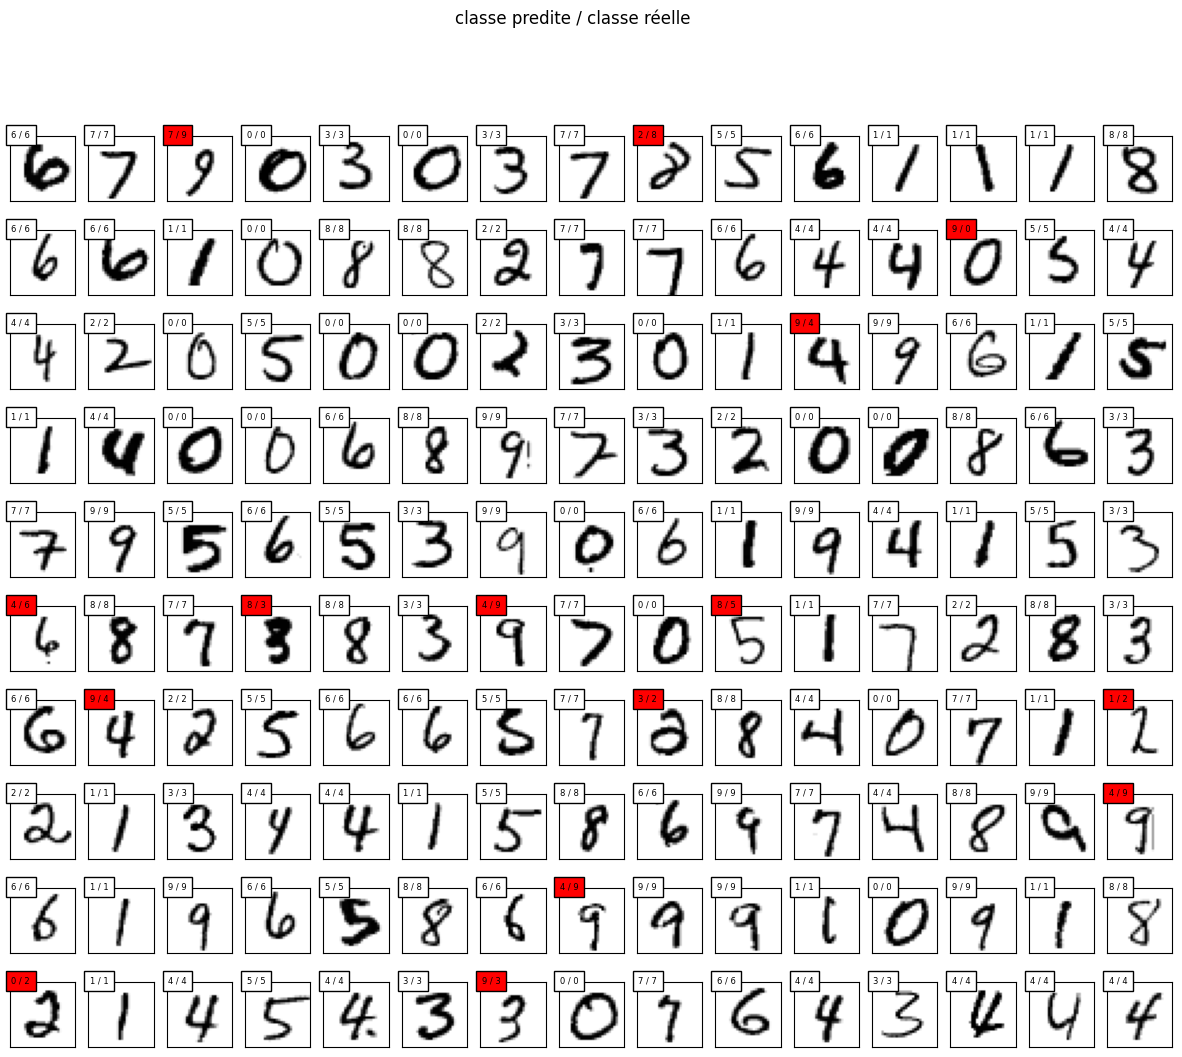

In [ ]:
# classification au plus proche voisin et affichage
knn = neighbors.KNeighborsClassifier(n_neighbors=1, n_jobs=-1)
%time knn.fit(X_train, y_train)
%time y_pred_nn = knn.predict(X_test)
print('KNN score: %f' % metrics.accuracy_score(y_test, y_pred_nn))
affichage_150_images(X_test,y_test,y_pred_nn)

In [ ]:
%time y_pred_nn = knn.predict(X_test)
%time knn.fit(X_train, y_train)

CPU times: user 1.09 s, sys: 2.66 ms, total: 1.1 s
Wall time: 663 ms
CPU times: user 42.3 ms, sys: 0 ns, total: 42.3 ms
Wall time: 38 ms


KNeighborsClassifier(n_jobs=-1, n_neighbors=1)

__Question 2__.Comparez aux résultats obtenus par

- la classification naïve bayésienne gaussienne décrite dans la [documentation scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)
    
-  à la régression logistique, décrite dans la [documentation scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
  

CPU times: user 55.7 ms, sys: 1.9 ms, total: 57.6 ms
Wall time: 59 ms
naive score: 0.589000


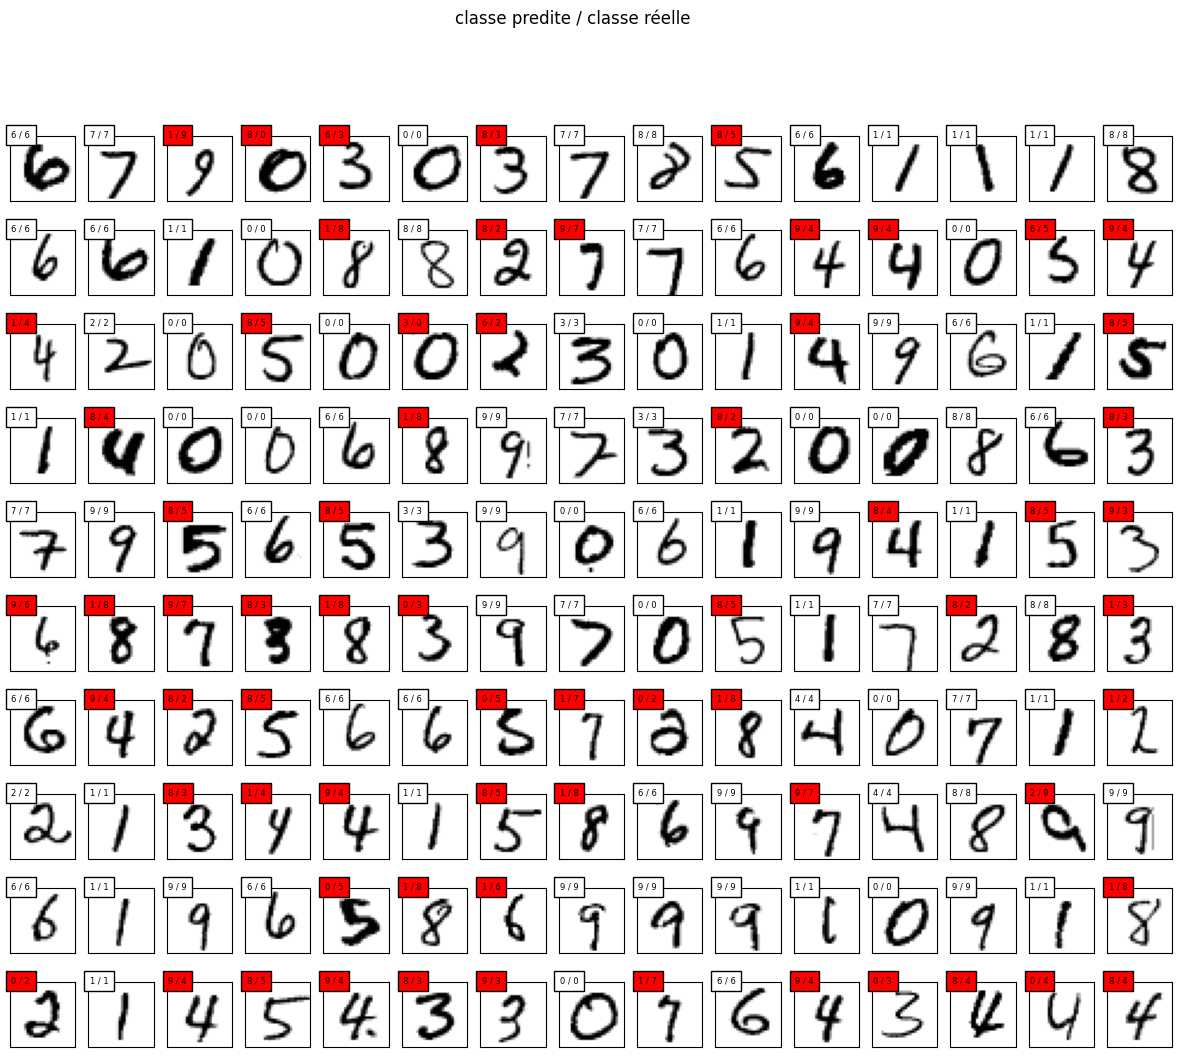

In [ ]:
from sklearn import naive_bayes

# votre code pour le classifieur naif Gaussien:
naive = naive_bayes.GaussianNB()
naive.fit(X_train, y_train)
%time y_pred_naive = naive.predict(X_test)
print('naive score: %f' % metrics.accuracy_score(y_test, y_pred_naive))
affichage_150_images(X_test,y_test,y_pred_naive)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


CPU times: user 8.65 ms, sys: 2.05 ms, total: 10.7 ms
Wall time: 5.36 ms
linear score: 0.915000


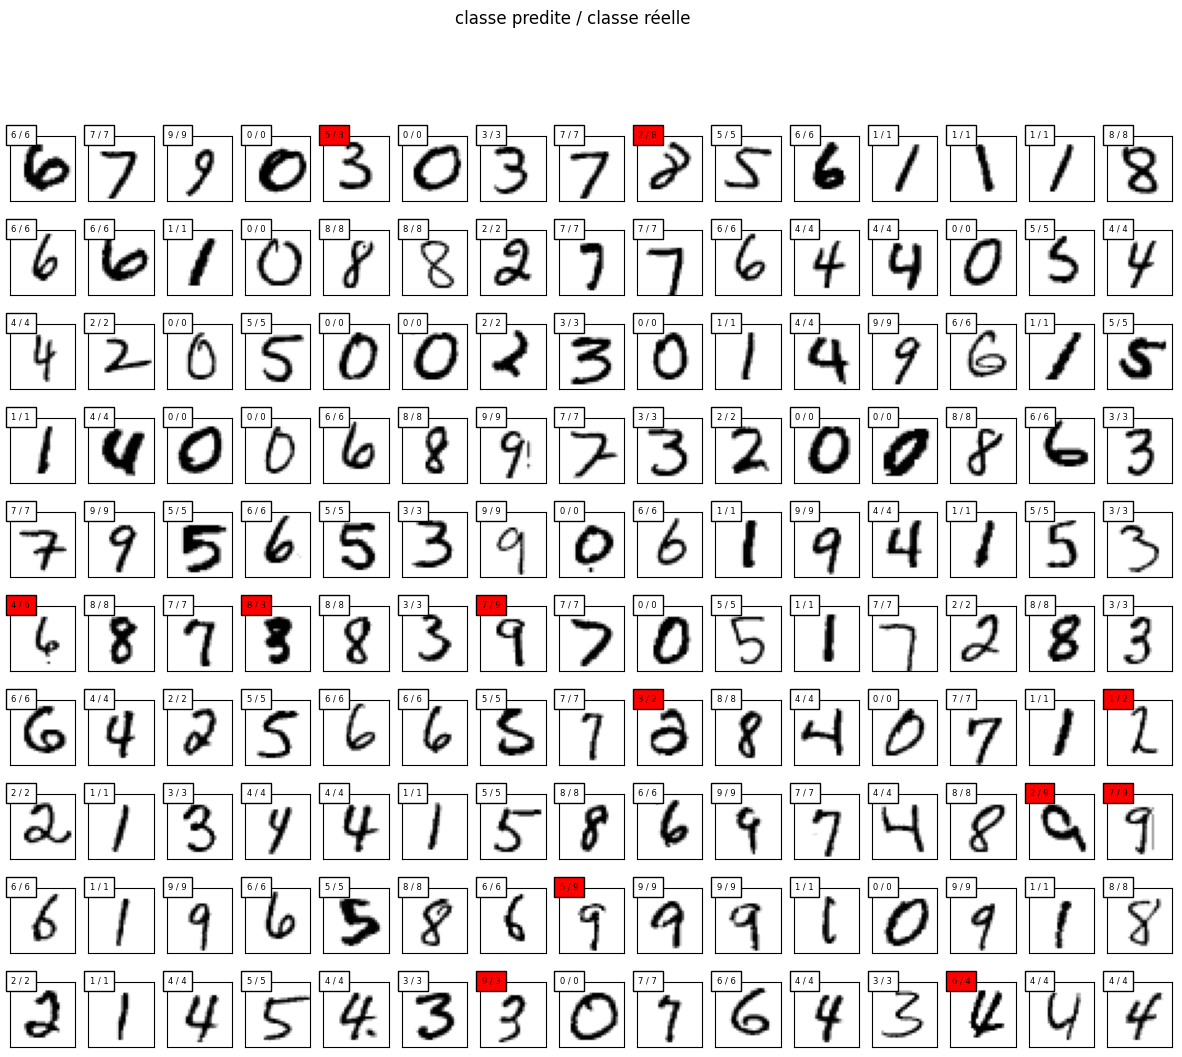

In [ ]:
from sklearn import linear_model

# votre code pour la régression logistique:
# votre code pour le classifieur naif Gaussien:
linear = linear_model.LogisticRegression()
linear.fit(X_train, y_train)
%time y_pred_linear = linear.predict(X_test)
print('linear score: %f' % metrics.accuracy_score(y_test, y_pred_linear))
affichage_150_images(X_test,y_test,y_pred_linear)

<font color=red>
Liste des scores : <br>
linear score: 0.915000<br>
naive score: 0.589000<br>
KNN score: 0.928000<br>
<br>
En analysant les résultats obtenues nous pouvons directement affirmé que la classification naïve bayésienne gaussienne n'est pas adapté.
<br>
Nous obtenons des résultats similaire pour les deux autres méthodes.

### **Analyse des résultats**

<br>

On dispose des matrices de confusion, décrites [ici](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html), et des rapports de classification, décrits [là](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).

__Question 3__. Affichez ces matrices et rapports pour les trois classifieurs testés.

*Votre réponse ici*

In [ ]:
# votre code ici :
#librairie
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#matrice de confusion
matrice_linear = confusion_matrix(y_test, y_pred_linear)
matrice_naive = confusion_matrix(y_test, y_pred_naive)
matrice_nn = confusion_matrix(y_test, y_pred_nn)
print("matrice linear : \n", matrice_linear,"\nmatrice naive \n",matrice_naive ,"\nmatrice knn \n", matrice_nn)
#rapports de classifications
class_linear = classification_report(y_test, y_pred_linear)
class_naive = classification_report(y_test, y_pred_naive)
class_nn =classification_report(y_test, y_pred_nn)
print("\nclassification linear : \n", class_linear,"\nclassification naive \n",class_naive ,"\nclassification knn \n", class_nn)

matrice linear : 
 [[106   0   0   0   0   2   1   1   0   0]
 [  0 103   0   1   0   0   0   0   0   0]
 [  0   1  90   2   2   1   0   0   6   0]
 [  0   0   0 103   1   2   1   1   1   1]
 [  1   1   0   0  73   1   1   1   0   3]
 [  2   0   1   3   1  79   0   0   3   0]
 [  0   0   0   0   2   0 104   0   0   0]
 [  0   1   1   0   1   0   0 105   0   1]
 [  0   5   4   0   2   4   5   2  76   0]
 [  0   0   2   3   4   2   0   4   0  76]] 
matrice naive 
 [[ 97   0   4   1   0   0   2   0   4   2]
 [  0 101   0   0   0   0   1   0   0   2]
 [ 22   4  41   1   0   0  16   0  17   1]
 [ 11  10   0  44   0   1   2   3  31   8]
 [  3   3   0   0  16   0   5   1  12  41]
 [  8   7   0   2   0   5   3   0  60   4]
 [  1   4   1   0   0   0  99   0   0   1]
 [  0   4   0   0   0   1   0  48   2  54]
 [  1  28   0   1   1   0   7   0  55   5]
 [  1   3   1   0   0   0   0   0   3  83]] 
matrice knn 
 [[105   0   0   1   0   0   3   0   0   1]
 [  0 103   0   0   0   0   0   0   1   0]
 

__Question 4__. Quelles sont les informations fournies par `classification_report` et `confusion_matrix` du module `metrics` ?


<font color = red>
Le module metrics de scikit-learn fournit deux fonctions utiles pour évaluer la performance des modèles de classification.<br><br>
Précision : <br>
C'est la proportion d'observations classées positivement qui sont réellement positives. C'est calculé comme TP / (TP + FP), où TP est le nombre de vrais positifs et FP est le nombre de faux positifs.
<br><br>
Rappel :
C'est la proportion d'observations réellement positives qui ont été correctement classées comme positives. C'est calculé comme TP / (TP + FN), où TP est le nombre de vrais positifs et FN est le nombre de faux négatifs.
<br><br>
F1-score :
C'est une mesure qui combine à la fois la précision et le rappel en une seule métrique. Il est calculé comme 2 * (précision * rappel) / (précision + rappel).
<br><br>
Support :
Le nombre total d'observations dans la classe.
<br><br>
Confusion_matrix génère une matrice de confusion qui montre combien d'observations ont été correctement et incorrectement classées pour chaque classe du problème de classification.<br><br>
Vrais positifs (True Positives, TP) : Le nombre d'observations positives qui ont été correctement classées comme positives.<br><br>
Vrais négatifs (True Negatives, TN) : Le nombre d'observations négatives qui ont été correctement classées comme négatives.<br><br>
Faux positifs (False Positives, FP) : Le nombre d'observations négatives qui ont été incorrectement classées comme positives.<br><br>
Faux négatifs (False Negatives, FN) : Le nombre d'observations positives qui ont été incorrectement classées comme négatives .




### **Machine à vecteurs de support (SVM)**

<br>

Prenez connaissance de la [documentation scikit-learn sur les SVM](http://scikit-learn.org/stable/modules/svm.html): lisez l'introduction, l'introduction de 1.4, et survolez le reste pour savoir y revenir le jour où vous en avez besoin.

On utilisera la [classe SVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).

Notez la valeur par défaut de l'hyperparamètre $C$, et les fonctions noyau disponibles nativement (ainsi que leurs paramètres).

<br>

In [ ]:
from sklearn import datasets, metrics, preprocessing
from sklearn.svm import SVC

# initialiser le classifieur SVM et choisir les valeurs des hyperparamètres et le noyeau
SVM_classifier = SVC(C=1,kernel="linear",gamma=0.001)

# entrainer le SVC_classifier avec les données X_train, y_train
SVM_classifier.fit(X_train, y_train)

# tester le SVC_classifier avec X_test
predictions = SVM_classifier.predict(X_test)

# Evalution de la performance de SVC_classifier en utilisant y_test et les predictions
print("Performance Report: \n %s \n" % (metrics.classification_report(y_test, predictions)))


Performance Report: 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       110
           1       0.97      0.99      0.98       104
           2       0.91      0.89      0.90       102
           3       0.90      0.96      0.93       110
           4       0.85      0.94      0.89        81
           5       0.92      0.88      0.90        89
           6       0.90      0.96      0.93       106
           7       0.95      0.95      0.95       109
           8       0.91      0.79      0.84        98
           9       0.96      0.87      0.91        91

    accuracy                           0.92      1000
   macro avg       0.92      0.92      0.92      1000
weighted avg       0.92      0.92      0.92      1000
 



__Question 5__. Changez la valeur de l'hyperparamètre C et le noyeau (kernel) (regardez [classe SVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) ), Que remarquez-vous ?

<font color= red>
Nous observons que lorsque l'on change l'hyperparamètre C, les changements sur les scores de performances sont négligeable, mais lorsque l'on change le kernel il y a des grosses variations qui n'améliore pas la performance.

## **Pour les plus rapides, complément facultatif (bonus)**

**Tester votre modèle avec votre écriture**

Ecrivez à la main un chiffre sur une feuille blanche, utilisez la webcam pour prendre une photo de la feuille. Les codes suivants vous permettent de prendre et enregistrer une capture de votre feuille. Cliquez sur le boutton capture


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


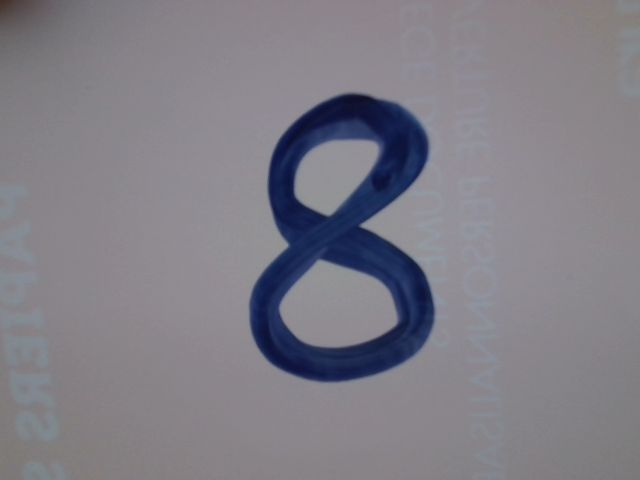

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

Mise en forme de l'image

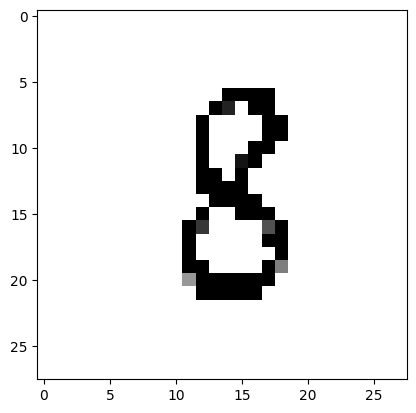

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

gray = cv2.imread("photo.jpg", cv2.IMREAD_GRAYSCALE)
ret,gray = cv2.threshold(gray,50,255,cv2.THRESH_BINARY)
gray = cv2.resize(255-gray, (28, 28))

flatten = gray.flatten() / 255.0
flatten=flatten.reshape(1, -1)

plt.imshow(np.reshape(flatten,size_images),cmap='gray_r')

Le code suivant vous permet de tester votre modèle, il suffit de remplacer 'mlp' par le nom de votre modèle pour le tester et afficher le chiffre détecté.

<font color=red>
Remplacez <b>VotreModele</b> par le modèle de votre choix

In [ ]:
predicton=linear.predict(flatten)
print('le chiffre détecté est le :', predicton)

le chiffre détecté est le : ['3']
